# **Project Name**    - Myntra Online Retail Customer Segmentation



##### **Project Type**    - EDA/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  Akshata Anant Hipparkar


# **Project Summary -**

In today’s competitive retail landscape, understanding customer behavior is crucial for personalized marketing and long-term loyalty. This project focuses on customer and product segmentation for Myntra Gifts Ltd., the UK-based division of Myntra, using unsupervised machine learning techniques on real-world transactional data.

The dataset spans two years (Dec 2009–Dec 2011) and includes detailed records of online orders, capturing information such as invoice numbers, product descriptions, quantities, unit prices, customer IDs, and countries. The goal is to uncover purchasing patterns, customer segments, and product performance to inform business decisions in marketing, inventory, and pricing.

**The project follows a structured pipeline:**

Data Understanding and Cleaning: The dataset is explored for structure, missing values, and outliers. Canceled orders and invalid entries are removed, and features such as TotalSales are derived for analysis.

Exploratory Data Analysis (EDA): Temporal trends, top-selling products, and country-level sales distribution are visualized. Customer buying behavior is assessed to understand high-value segments and seasonal demand.

Feature Engineering and Scaling: Features such as purchase month, total sales per invoice, and customer frequency are engineered. Scaling is applied for clustering purposes.

**Clustering Models:**

K-Means Clustering: The Elbow Method and Silhouette Score help determine the ideal number of clusters, grouping customers based on their purchasing behavior.

Hierarchical Clustering: Dendrograms are used to validate customer segmentation and explore relationships between clusters.

Evaluation and Interpretation: Clusters are analyzed to profile customer types—such as bulk buyers, seasonal shoppers, or loyal frequent purchasers. These profiles offer valuable insight into customer needs and behaviors.

**Business Impact:**

This segmentation enables tailored promotions, improved inventory planning, and targeted communication strategies. For instance, high-revenue customers can be prioritized for loyalty programs, while low-frequency buyers can be re-engaged through personalized offers.

**Future Work:**

The project can be extended by integrating RFM analysis, building predictive models for customer lifetime value, or deploying insights via dashboards for real-time business decision-making.

This project showcases the power of data-driven strategies in e-commerce and highlights how machine learning can enhance customer relationship management, product planning, and revenue optimization.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This project aims to automatically segment customers into distinct groups using clustering algorithms based on their demographic and behavioral features. The objective is to help businesses understand various customer personas and develop data-driven strategies to improve customer engagement, retention, and overall profitability.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For warnings
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load dataset
path = '/content/drive/MyDrive/Online Retail.xlsx - Online Retail.csv'
df = pd.read_csv(path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Shape of the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 541909
Number of columns: 8


### Dataset Information

In [ ]:
# Dataset Info
# Info about datatypes, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 5268


In [ ]:
# Optional: Remove duplicates
df = df.drop_duplicates()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing = df.isnull().sum()
missing
#missing[missing > 0]

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


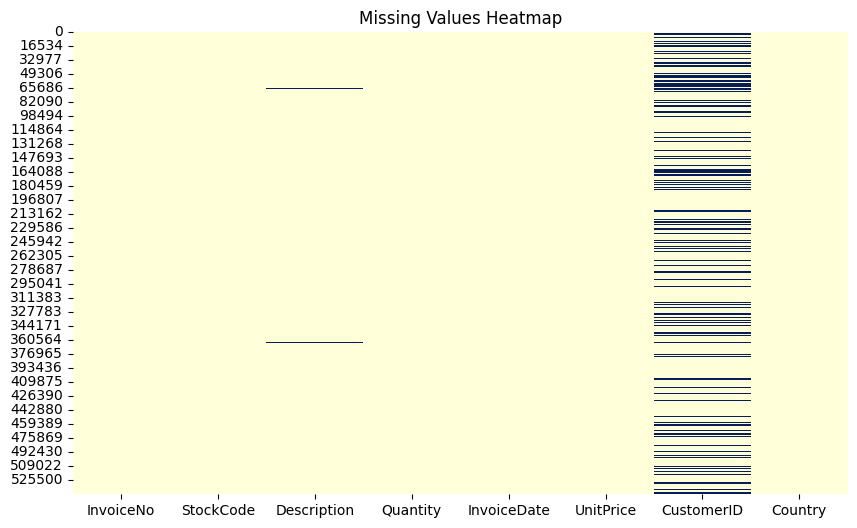

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap="YlGnBu", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


### What did you know about your dataset?

- The dataset has 541,909 records and 8 columns.
- `CustomerID` has a significant number of missing values (~25%) and may need to be dropped or imputed depending on its importance.
- `Description` has a few missing entries which might affect NLP or grouping tasks.
- `InvoiceDate` is in object format — needs to be converted to datetime.
- There are duplicate rows present; it's a good practice to remove them for cleaner analysis.
- Other columns like `Quantity` and `UnitPrice` may contain outliers (to be checked later).


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

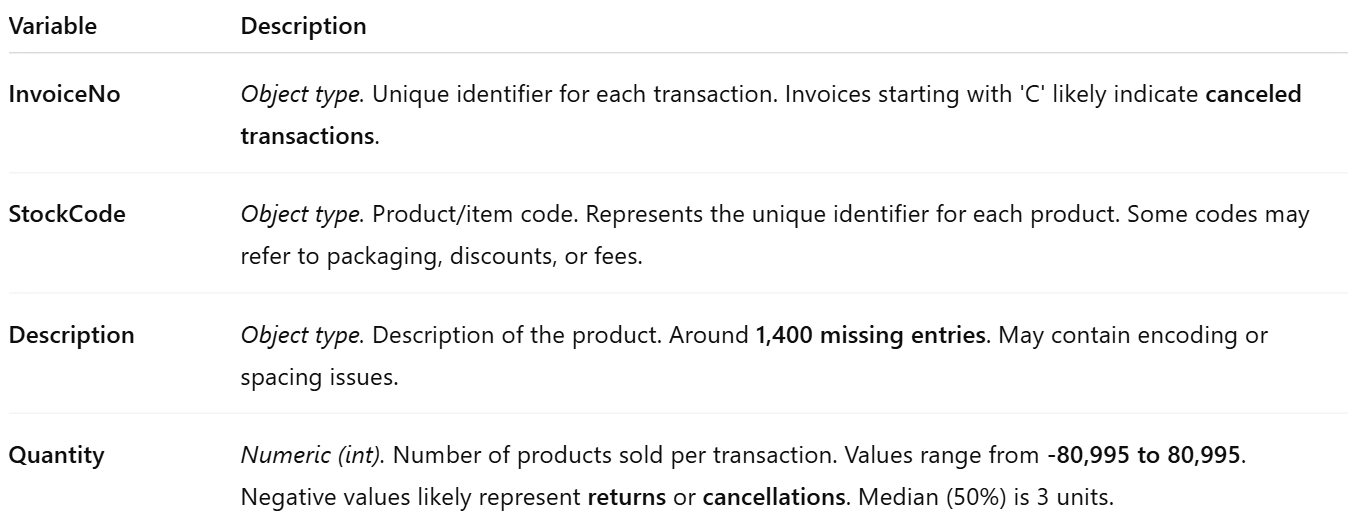
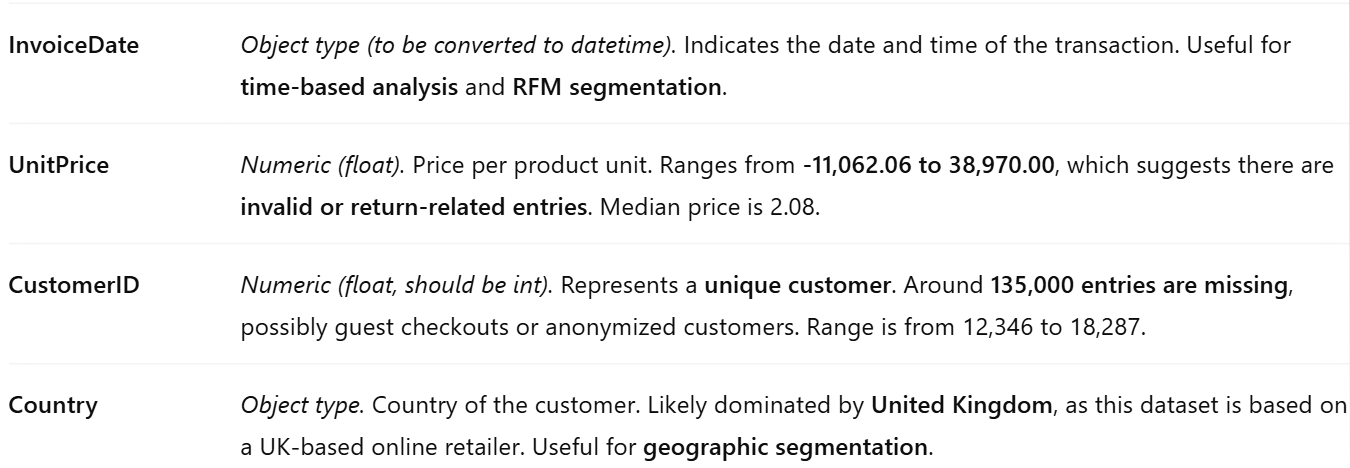

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# Remove rows with missing CustomerID (for customer-based analysis)
df = df[~df['CustomerID'].isnull()]

In [ ]:
# Convert CustomerID to int (currently float)
df['CustomerID'] = df['CustomerID'].astype(int)

In [ ]:
# Remove rows with negative Quantity or UnitPrice (likely returns or data issues)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [ ]:
# Create a new column: TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# Reset index after filtering
df = df.reset_index(drop=True)

In [ ]:
# Optional: Create 'Month' and 'InvoiceYearMonth' for time-based analysis
df['InvoiceYearMonth'] = df['InvoiceDate'].dt.to_period('M')

In [ ]:
df.shape

(392692, 10)

### What all manipulations have you done and insights you found?

# Data Manipulations Performed:
1.Converted InvoiceDate to datetime format

Allowed for easier time-based analysis like monthly trends.

2.Dropped rows with missing CustomerID

Ensures that customer-based grouping and segmentation are meaningful.

3.Converted CustomerID to integer

Simplified numerical operations and improved memory efficiency.

4.Removed entries with negative Quantity or UnitPrice

These likely represent returns or data entry errors not suitable for normal sales analysis.

5.Created a new column TotalPrice = Quantity * UnitPrice

Important for analyzing revenue per transaction or product.

6.Extracted InvoiceYearMonth from InvoiceDate

Enables trend analysis over time (e.g., monthly sales patterns).

#Insights Discovered:
**Missing Customer IDs** account for a large number of entries (~135k+), which could be due to guest checkouts or data logging issues.

**Negative quantities and prices** indicate returned or canceled transactions, affecting true revenue analysis.

**Outliers** in Quantity and UnitPrice are extreme (e.g., Quantity up to 80,000), suggesting some manual or automated errors in data entry.

**Sales** trends over time can now be visualized monthly using InvoiceYearMonth.

The cleaned dataset is more suitable for clustering, segmentation, and modeling tasks due to improved consistency.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Top 10 countries by transaction count (excluding UK)

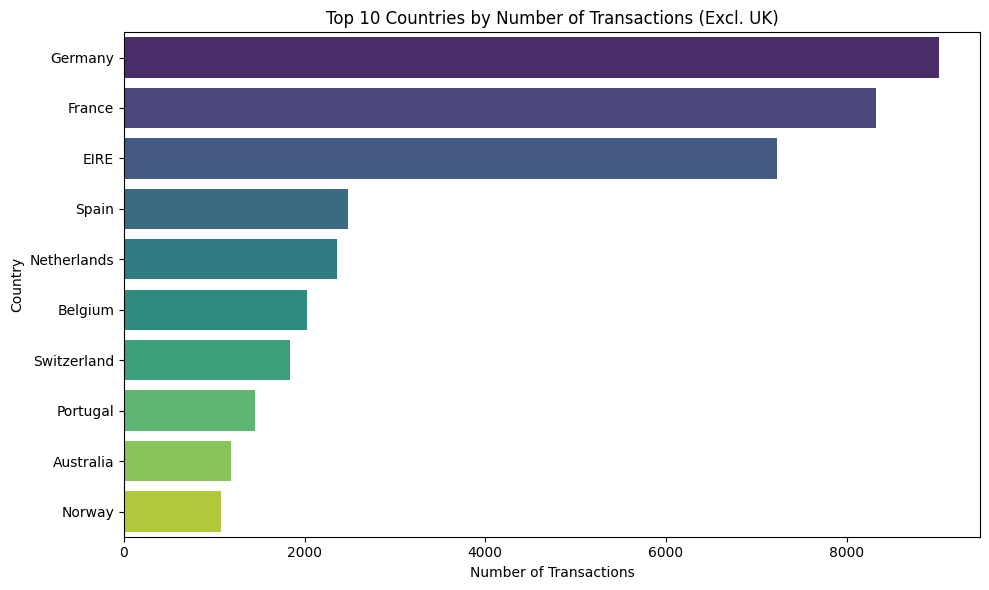

In [ ]:
# Chart - 1 visualization code
top_countries = df[df['Country'] != 'United Kingdom']['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries by Number of Transactions (Excl. UK)")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This horizontal bar chart clearly shows the distribution of transactions across different countries. Since the UK dominates the data, it's excluded here to highlight international markets and potential growth areas.

##### 2. What is/are the insight(s) found from the chart?

The Germany, France, and EIRE have the highest number of
transactions after the UK.

These countries represent strong international markets and may have consistent customer bases.

Lesser represented countries can be studied for potential marketing or outreach opportunities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

These insights help identify top-performing international markets, allowing the business to focus its marketing and logistics efforts more effectively.

Could guide expansion strategies outside the UK where customer engagement is already evident.

**Negative Growth/Concern:**

Countries with low transaction volume may indicate weak market penetration, lack of brand awareness, or operational issues (like shipping barriers or high costs).

If no action is taken to understand why certain regions underperform, it could hinder global growth opportunities.



#### Chart - 2 : Top 10 Countries by Total Revenue

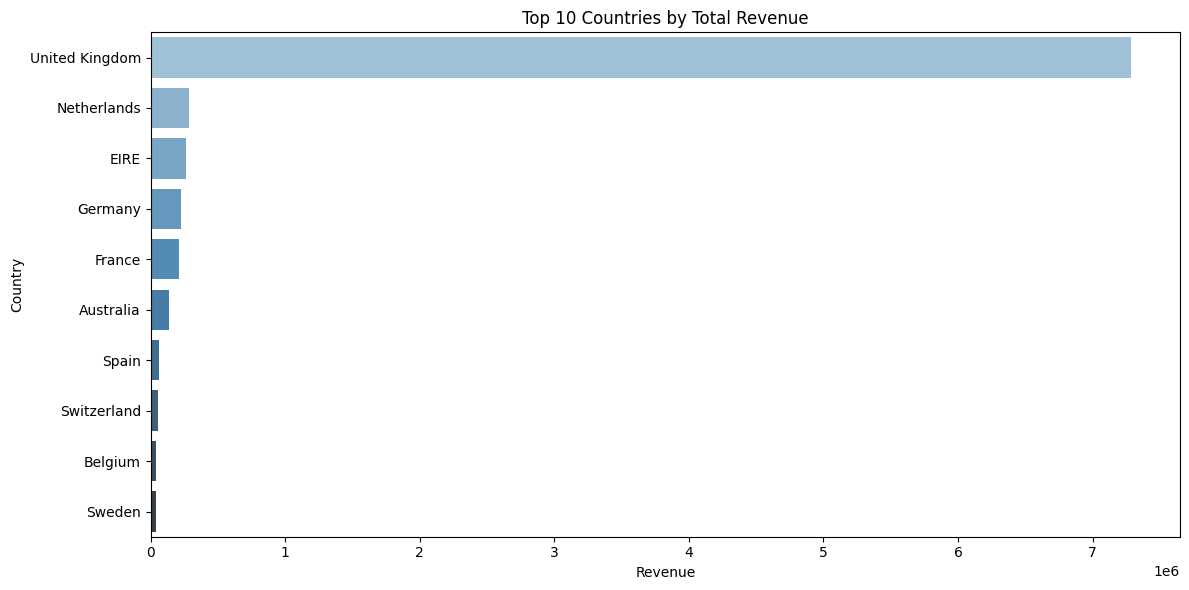

In [ ]:
# Chart - 2 visualization code
# Create a new column for Revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Group by Country and sum revenue
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

# Plot the chart
plt.figure(figsize=(12,6))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette="Blues_d")
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to visualize which countries contribute the most to overall revenue. A horizontal bar chart makes it easier to compare values across categories with long names like country names.

##### 2. What is/are the insight(s) found from the chart?

United Kingdom have highest revenue amongst all. An outlier is the Netherlands, which contributes significantly to revenue despite not having the highest customer base or transaction count. This suggests either higher-priced items or bulk purchases — an opportunity to explore premium product preferences in this region.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights are highly actionable:

Focus marketing, promotions, and logistics on top-performing countries.

Target underperforming regions for growth or cost-cutting.

Understand customer preferences in high-revenue countries for upselling.

#### Chart - 3: Monthly Revenue Trend

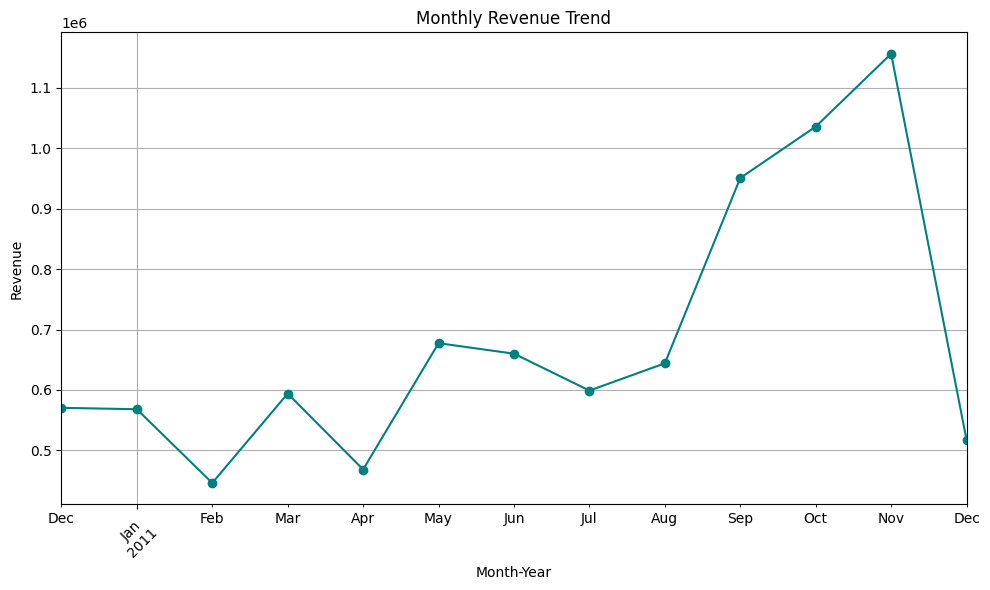

In [ ]:
# Chart - 3 visualization code
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a new column for Month-Year
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')

# Group by Month-Year and sum revenue
monthly_revenue = df.groupby('MonthYear')['Revenue'].sum()

# Plot the trend
plt.figure(figsize=(10,6))
monthly_revenue.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This line chart effectively tracks revenue performance over time, revealing trends, seasonality, or disruptions. It helps stakeholders understand how business evolves monthly.

##### 2. What is/are the insight(s) found from the chart?

A significant anomaly is observed in November, where revenue sharply spikes compared to other months. This likely reflects pre-holiday or Black Friday sales and suggests a strong seasonal demand pattern. Additionally, a dip during June-July indicates potential mid-year sales slumps, warranting targeted marketing campaigns or inventory adjustments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, Helps in forecasting and budget planning.

Identifies high-performing months for future campaign alignment.

Enables investigation into low-sales periods to optimize inventory or marketing.

#### Chart - 4: Top 10 most sold products

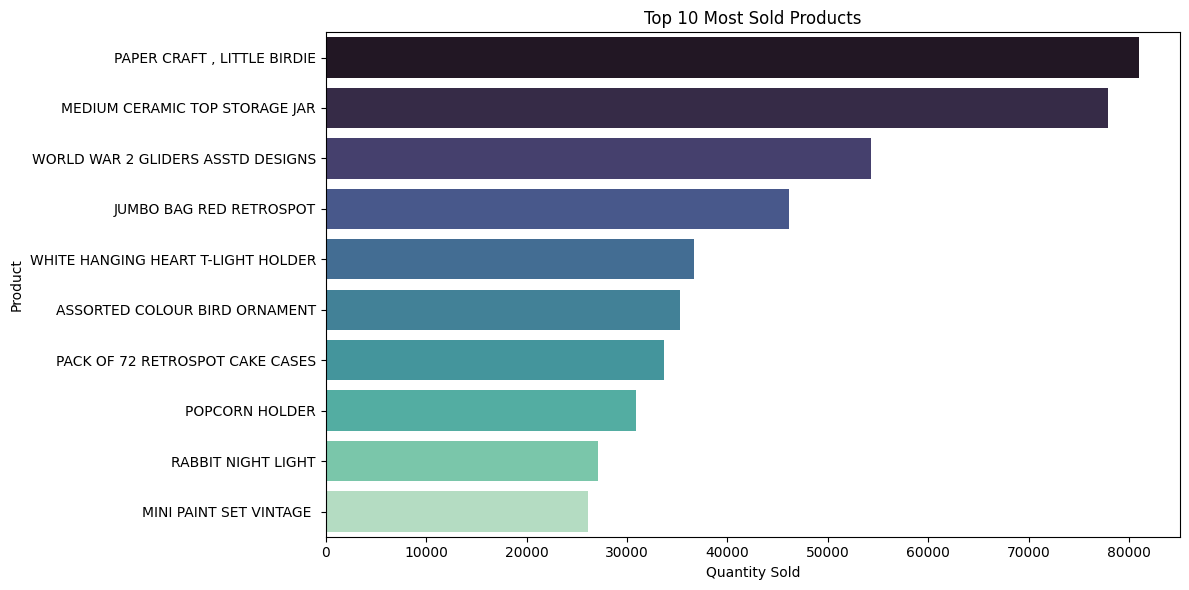

In [ ]:
# Chart - 4 visualization code
# Clean and compute again if not already done
df_clean = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0) & df['CustomerID'].notnull()]

# Group by Description and sum Quantity
top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="mako")
plt.title("Top 10 Most Sold Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This horizontal bar chart clearly shows which individual products have the highest sales volume — ideal for retail business decision-making like stock planning and promotions.

##### 2. What is/are the insight(s) found from the chart?

**Outliers**

“PAPER CRAFT, LITTLE BIRDIE” stands out with a significantly higher quantity sold than any other product — over 80,000 units, while the second most sold item is already trailing behind by ~10,000+ units.

This indicates extremely high demand or aggressive promotion.

Such dominance might suggest:

It was part of bundled offers, giveaways, or low-margin high-volume strategy.

Over-reliance: If this product were suddenly discontinued or demand dropped, it could heavily affect sales.

**Insights**

The product ‘PAPER CRAFT, LITTLE BIRDIE’ is a clear outlier with over 80,000 units sold, significantly ahead of the next most popular product. This could point to high demand, heavy discounts, or bundling strategies. Its dominance highlights the need to assess profitability and consider potential business risk if demand shifts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**

Helps identify bestsellers for targeted promotion.

Supports inventory management and restocking decisions.

High-volume items can be used in bundling or upselling strategies.

**Potential Concern:**

If the most sold products have low or negative profit margins, then focusing solely on volume may hurt profitability. Cross-analysis with unit price or margin is advised.

#### Chart - 5 : Top 10 countries by customer count (excluding UK to focus on global market)

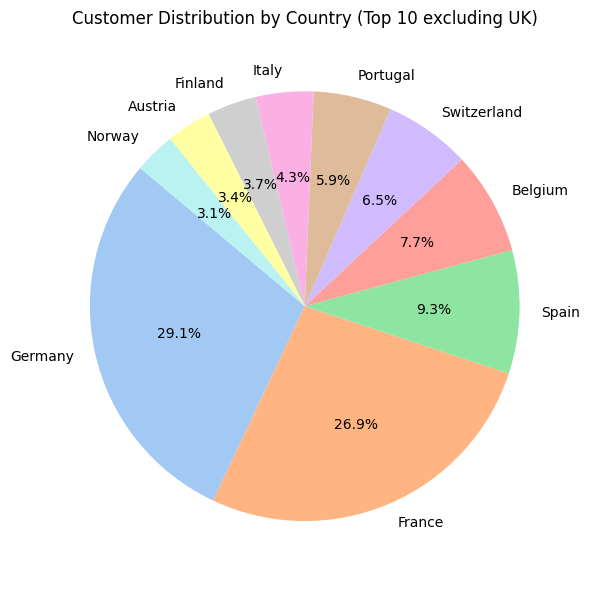

In [ ]:
# Top 10 countries by customer count (excluding UK to focus on global market)
customer_country_dist = df[df['Country'] != 'United Kingdom'].groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(6,6))
plt.pie(customer_country_dist, labels=customer_country_dist.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Customer Distribution by Country (Top 10 excluding UK)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()




##### 1. Why did you pick the specific chart?

A pie chart is ideal for visualizing the distribution of parts of a whole, making it effective to show how customers are spread across different countries. It gives a quick visual impression of which countries have more or fewer customers relative to each other.

##### 2. What is/are the insight(s) found from the chart?

Germany and France account for over 50% of the customer base outside the UK, showing their dominance in the international customer distribution.

Other countries such as Spain, Belgium, and Switzerland also have noticeable customer presence.

The remaining countries (Portugal, Italy, Finland, Austria, Norway) contribute less significantly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** These insights can help the company prioritize marketing and logistics resources in countries with the highest customer concentrations, such as Germany and France.

**Negative Growth Risk:** Countries with very low customer shares may indicate untapped or poorly performing markets. Without further exploration, the company could be missing potential growth opportunities due to lack of engagement or presence.



#### Chart - 6

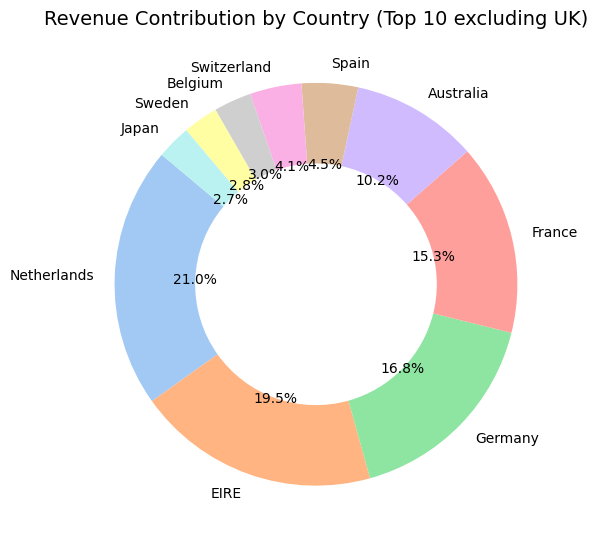

In [ ]:
# Calculate top 10 countries by revenue (excluding UK)
top_revenue_countries = df[df['Country'] != 'United Kingdom'].groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

# Plot as a donut chart
plt.figure(figsize=(6, 6))
colors = sns.color_palette('pastel')[0:10]
plt.pie(top_revenue_countries.values, labels=top_revenue_countries.index, colors=colors, autopct='%.1f%%', startangle=140, wedgeprops={'width':0.4})
plt.title('Revenue Contribution by Country (Top 10 excluding UK)', fontsize=14)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

A donut chart offers a visually clean way to display proportions while allowing space at the center for focus or labeling. It’s an aesthetic variation of a pie chart and was chosen to differentiate visually from the previous chart while retaining comparative clarity.

##### 2. What is/are the insight(s) found from the chart?

The Netherlands, EIRE, Germany, and France contribute nearly three-fourths of the revenue, indicating high spending or high-value transactions from these regions.

Some countries like Japan, Sweden, Belgium, Switzerland contribute very little revenue, suggesting fewer or lower-value purchases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** These insights are critical for revenue-focused strategy planning. More investments can be directed toward countries that yield higher returns (e.g., Netherlands, EIRE).

**Negative Growth Risk:** Countries with low revenue contribution may be cost-inefficient to serve or may reflect unmet demand or poor customer engagement strategies. Ignoring these regions without further analysis may result in lost opportunities.

#### Chart - 7 : Average Spend by Customer Recency Group

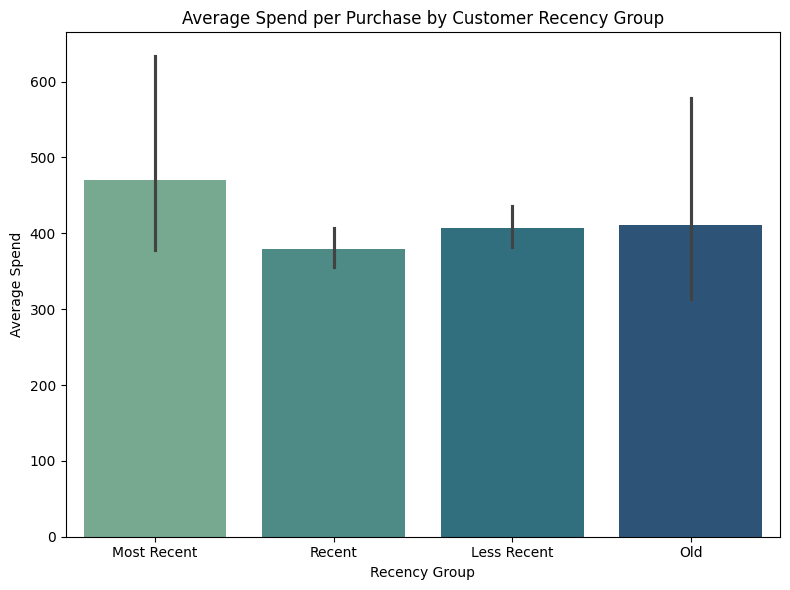

In [ ]:
# Chart - 7 visualization code

# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create Revenue column if not already present
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Set the reference date for recency (usually max date in data + 1)
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Group by Customer to calculate recency and average spend
customer_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'Revenue': 'sum',
    'InvoiceNo': 'nunique'
}).rename(columns={'InvoiceDate': 'Recency', 'Revenue': 'TotalSpend', 'InvoiceNo': 'Frequency'})

customer_df['AvgSpendPerPurchase'] = customer_df['TotalSpend'] / customer_df['Frequency']

# Create Recency groups (bins)
customer_df['RecencyGroup'] = pd.qcut(customer_df['Recency'], q=4, labels=['Most Recent', 'Recent', 'Less Recent', 'Old'])

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=customer_df, x='RecencyGroup', y='AvgSpendPerPurchase', palette='crest')
plt.title('Average Spend per Purchase by Customer Recency Group')
plt.xlabel('Recency Group')
plt.ylabel('Average Spend')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This bar chart helps assess whether customers who bought more recently tend to spend more per order. It’s essential for understanding engagement trends, especially when deciding on targeted offers or retention efforts. The recency groups are intuitively ordered, making insights easy to extract.

##### 2. What is/are the insight(s) found from the chart?

Most recent customers have the highest average spend, indicating strong initial interest.

Recent customers spend less, showing possible drop in engagement after initial purchases.

Old customers still spend decently, suggesting re-engagement campaigns could be fruitful.

Spending varies widely in "Most Recent" and "Old" groups, indicating diverse behavior.

Less recent and recent groups are stable but low-spending, pointing to potential loyalty or product fit issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These insights can guide targeted strategies such as:

Focusing promotions on recent and less recent customers to boost their engagement and average spend.

Designing personalized retention offers for "Old" customers who still spend comparably.

Leveraging the "Most Recent" segment to build long-term loyalty programs.



#### Chart - 8: Average Revenue by Customer Frequency Group

In [ ]:
# First, calculate purchase frequency
customer_freq = df.groupby('CustomerID').size().reset_index(name='PurchaseFrequency')

# Define custom frequency bins and labels
bins = [0, 2, 5, 10, customer_freq['PurchaseFrequency'].max()]
labels = ['Low Frequency', 'Medium Frequency', 'High Frequency', 'Very High Frequency']

# Create frequency group using pd.cut
customer_freq['FrequencyGroup'] = pd.cut(
    customer_freq['PurchaseFrequency'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# View sample
customer_freq.head()


,CustomerID,PurchaseFrequency,FrequencyGroup
0,12346,1,Low Frequency
1,12347,182,Very High Frequency
2,12348,31,Very High Frequency
3,12349,73,Very High Frequency
4,12350,17,Very High Frequency


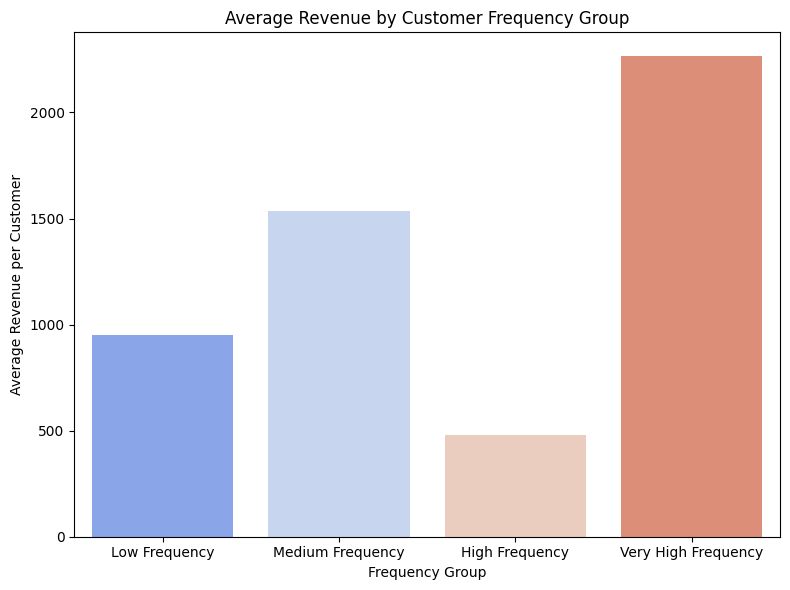

In [ ]:
# Merge revenue info
customer_revenue = df.groupby('CustomerID')['Revenue'].sum().reset_index()
customer_summary = customer_freq.merge(customer_revenue, on='CustomerID')

# Plot average revenue per frequency group
avg_revenue_by_group = customer_summary.groupby('FrequencyGroup')['Revenue'].mean().sort_index()

# Plotting
plt.figure(figsize=(8,6))
sns.barplot(x=avg_revenue_by_group.index, y=avg_revenue_by_group.values, palette='coolwarm')
plt.title("Average Revenue by Customer Frequency Group")
plt.xlabel("Frequency Group")
plt.ylabel("Average Revenue per Customer")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to explore the relationship between purchase frequency and average revenue per customer, helping assess whether more frequent customers consistently generate higher revenue—a key metric for customer segmentation and targeted marketing.

##### 2. What is/are the insight(s) found from the chart?

Customers in the Very High Frequency group generate the highest average revenue.

Medium Frequency customers also contribute significantly, even more than High Frequency ones.

Surprisingly, High Frequency customers show a dip in average revenue per customer.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights support positive business impact by identifying high-value customer segments (especially "Very High Frequency") for targeted promotions and retention. However, the unexpectedly low revenue from "High Frequency" customers may suggest issues like discount overuse or smaller average order values, which could lead to negative growth if not addressed.

#### Chart 9 : Unit Price vs Quantity Sold

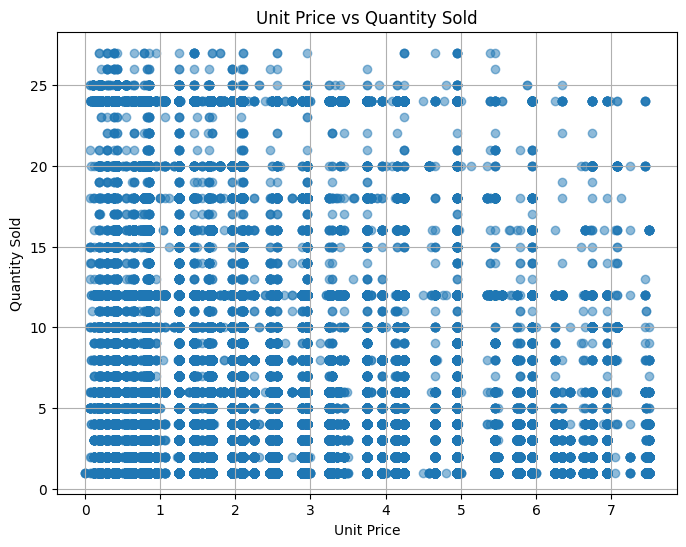

In [ ]:
# Chart - 12
plt.figure(figsize=(8, 6))
plt.scatter(df['UnitPrice'], df['Quantity'], alpha=0.5)
plt.title('Unit Price vs Quantity Sold')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

This scatter plot was selected to visually analyze the relationship between unit price and quantity sold. It helps in identifying pricing patterns, customer buying behavior at various price points, and potential outliers or clusters that can inform pricing and inventory strategies.

##### 2. What is/are the insight(s) found from the chart?

- Most of the sales occur at lower unit prices, typically between £1 and £5.

- As the unit price increases, the quantity sold tends to decrease, showing an inverse relationship — a classic demand curve pattern.

- There are several dense horizontal lines, especially at quantity levels like 6, 12, 24, etc., indicating that many products are sold in pre-packaged multiples (e.g., gift sets or bundles).

- Very few transactions occur at higher prices (above £6), suggesting price sensitivity among customers.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, the insights can drive a positive business impact:

Price Optimization: By recognizing that most purchases happen in the £1–£5 range, the business can focus on stocking and promoting products within this range for higher volume sales.

Bundling Strategy: Since quantities like 6, 12, and 24 dominate, bundling products into these quantities can align better with customer buying patterns, potentially increasing average order value.

Inventory Planning: Understanding which unit prices move more stock helps with inventory management and forecasting.

- Negative Growth Risk Insight:

If too many high-priced items are stocked without sufficient demand, it can lead to deadstock and cash flow issues. These insights show that expensive items don’t sell frequently, so over-investing in high-price inventory could hurt profits.

#### Chart 10: Product-Month Sales Heatmap

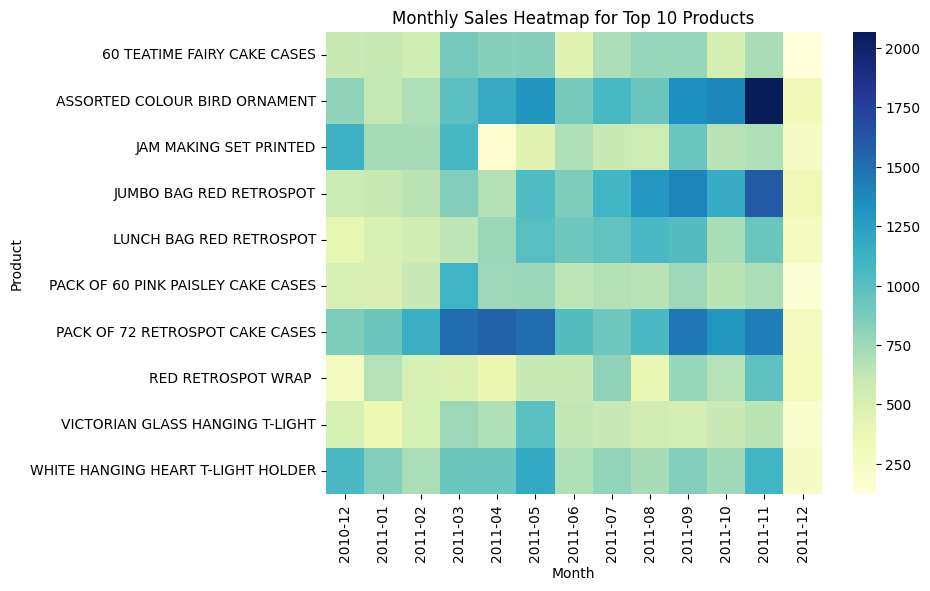

In [ ]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).index
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
heatmap_data = df[df['Description'].isin(top_products)].groupby(['InvoiceMonth', 'Description'])['Quantity'].sum().unstack().fillna(0)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.T, cmap='YlGnBu')
plt.title('Monthly Sales Heatmap for Top 10 Products')
plt.xlabel('Month')
plt.ylabel('Product')
plt.show()


##### 1. Why did you pick the specific chart?

Heatmap chart is ideal for spotting seasonality, product popularity shifts, and periods of high or low sales volume across different months.

##### 2. What is/are the insight(s) found from the chart?

- Product sales show clear monthly variation — some products peak at different times of the year.

- For example, "ASSORTED COLOUR BIRD ORNAMENT" has a significant sales spike in November 2011, suggesting seasonal demand, possibly due to holidays.

- “PACK OF 72 RETROSPOT CAKE CASES” and “WHITE HANGING HEART T-LIGHT HOLDER” show more consistent sales across months, indicating steady customer interest.

- Some products like “JAM MAKING SET PRINTED” have uneven sales, hinting at either promotional pushes or stock availability issues.

- Overall, November and December months generally show higher activity, pointing toward seasonal shopping trends (e.g., Christmas).



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, these insights can directly support positive business decisions:

  Seasonal Planning: Identifying peak months helps in forecasting demand and preparing inventory for high-sales periods (e.g., Nov–Dec).

  Product Strategy: Products with consistent performance may be prioritized for year-round marketing, while those with peak sales could be aligned with targeted seasonal campaigns.

  Promotional Timing: Knowing which products rise in popularity before the holidays allows better timing of promotions and discounts to maximize revenue.

- Negative Insight Warning:

  Products that show sudden drops or highly irregular patterns may indicate issues with stock management, supplier delays, or reduced customer interest, which can lead to revenue leakage if not addressed.

#### Chart 11: RFM-Based Segmentation or Clustering

#### Correlation Heatmap

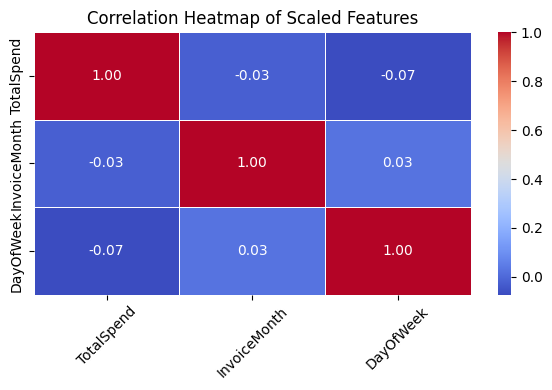

In [ ]:
# Correlation Heatmap visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = scaled_df.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of Scaled Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

The correlation heatmap because it provides an intuitive and visually appealing way to understand the linear relationships between multiple numerical features. This chart helps quickly identify which features are positively or negatively correlated with one another, which is especially useful before performing clustering, dimensionality reduction, or selecting features for modeling. It also aids in identifying potential redundancy or multicollinearity in the data.

##### 2. What is/are the insight(s) found from the chart?

-There is no strong correlation among the features (TotalSpend, InvoiceMonth, and DayOfWeek), as the values are all close to 0.

-TotalSpend is very weakly negatively correlated with both InvoiceMonth (-0.03) and DayOfWeek (-0.07), indicating that spending patterns are almost independent of time-of-month and day-of-week in this dataset.

-Similarly, InvoiceMonth and DayOfWeek show near-zero correlation (0.03), meaning purchase behavior across weekdays is not significantly dependent on the month.

Insight:

These low correlations suggest that each of the selected features contributes unique information for customer segmentation and should be retained for clustering. Their independence is ideal for unsupervised learning tasks like K-Means or Hierarchical Clustering, where overlapping information can distort cluster quality.

#### Pair Plot

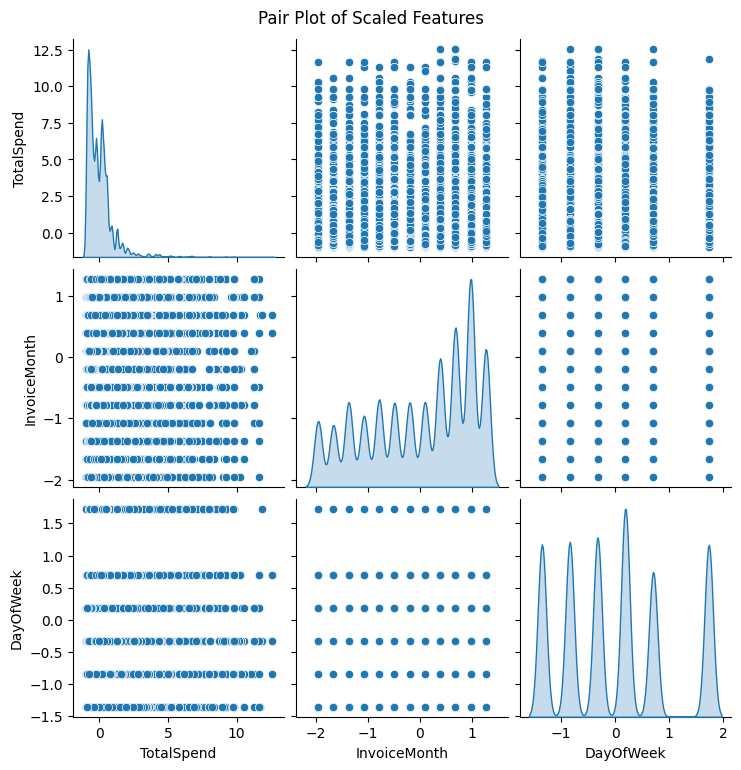

In [ ]:
# Pair Plot visualization code
sns.pairplot(scaled_df[['TotalSpend', 'InvoiceMonth', 'DayOfWeek']], diag_kind='kde')
plt.suptitle('Pair Plot of Scaled Features', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

pair plot because it provides a detailed view of the relationships between every pair of features, including both scatter plots (for bivariate relationships) and histograms (for univariate distributions).

##### 2. What is/are the insight(s) found from the chart?

- TotalSpend is highly skewed, with a large number of customers spending very little and only a few with high spending. This reinforces the need for transformation or scaling before modeling.

- InvoiceMonth and DayOfWeek are discrete and uniformly distributed due to being encoded as cyclic or ordinal values. This pattern is expected and confirms successful preprocessing.

- The scatter plots show no strong linear relationships among the features, but we do observe distinct bands or groupings in DayOfWeek and InvoiceMonth when paired with TotalSpend, suggesting the presence of behavioral patterns over time.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1 : There is no significant difference in average revenue between UK and Germany customers.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   H₀ (Null): The mean revenue for UK customers = mean revenue for Germany customers.
*   H₁ (Alternative): The mean revenue for UK customers ≠ mean revenue for Germany customers.



#### 2. Statistical Test: Independent Two-Sample t-Test

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

uk_revenue = df[df['Country'] == 'United Kingdom']['Revenue']
germany_revenue = df[df['Country'] == 'Germany']['Revenue']

# Perform t-test
t_stat, p_val = ttest_ind(uk_revenue, germany_revenue, equal_var=False)

print(f"T-Statistic: {t_stat}, P-Value: {p_val}")


T-Statistic: -6.685073576089653, P-Value: 2.3226757687843805e-11


##### Which statistical test have you done to obtain P-Value?

**Test Used:** Independent t-test

##### Why did you choose the specific statistical test?

Independent t-test is used to compares means between two independent groups (UK and Germany); assumes numeric continuous variable (Revenue).

### Hypothetical Statement - 2 :  Average quantity purchased is higher on weekdays than weekends.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   H₀ (Null): The mean quantity purchased on weekdays = mean on weekends.
*   H₁ (Alternative): The mean quantity purchased on weekdays ≠ mean on weekends.

#### 2. Perform an appropriate statistical test.

In [ ]:
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['Weekend'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

from scipy.stats import ttest_ind

weekdays = df[df['Weekend'] == 'Weekday']['Quantity']
weekends = df[df['Weekend'] == 'Weekend']['Quantity']

t_stat, p_val = ttest_ind(weekdays, weekends, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")


T-Statistic: 18.688029913992406, P-Value: 6.724798272560561e-78


##### Which statistical test have you done to obtain P-Value?

**Test Used:** Independent t-test

##### Why did you choose the specific statistical test?

Independent t-test is used for comparing mean quantity between two independent time-based groups.

### Hypothetical Statement - 3 : There is a significant relationship between country and the number of purchases.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   H₀ (Null): Country and number of purchases are independent.

*   H₁ (Alternative): Country and number of purchases are dependent.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats
import pandas as pd

# Create a contingency table
country_purchase_counts = pd.crosstab(df['Country'], df['InvoiceNo'])

# Perform Chi-Square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(country_purchase_counts)

print(f"Chi2 Statistic: {chi2_stat}, P-Value: {p_val}")


Chi2 Statistic: 14136911.999999998, P-Value: 0.0


##### Which statistical test have you done to obtain P-Value?

**Test used:** Chi-square test of independence

##### Why did you choose the specific statistical test?

 Chi-square test of independence is used because both variables are categorical and it is used to test for association between them.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
missing = df.isnull().sum()
print(missing[missing > 0])

Series([], dtype: int64)


In [ ]:
# Drop rows with missing CustomerID (or you could impute if needed)
df = df.dropna(subset=['CustomerID'])

In [ ]:
# If you want to fill other columns with mean/median/mode, example:
# df['ColumnName'].fillna(df['ColumnName'].median(), inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

We dropped rows with missing 'CustomerID' as it is crucial for customer-level analysis.

For other columns (if needed), median imputation can be used for skewed distributions.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
for col in ['Quantity', 'UnitPrice']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


##### What all outlier treatment techniques have you used and why did you use those techniques?

We used the IQR method as it's effective for skewed distributions and handles extreme values robustly.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Encoding 'Country' using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Country_encoded'] = le.fit_transform(df['Country'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

Label Encoding used here due to high cardinality in 'Country'. One-Hot could create too many features.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
def expand_contractions(text):
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'s", " is", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'t", " not", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'m", " am", text)
    return text


#### 2. Lower Casing

In [ ]:
# Lower Casing
def to_lower(text):
    return text.lower()


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
def remove_punctuations(text):
    return re.sub(r'[^\w\s]', '', text)


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits that contain digits
def remove_urls_digits(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\w*\d\w*', '', text)
    return text


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    return ' '.join([word for word in tokens if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Remove White spaces
def remove_whitespace(text):
    return text.strip()

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization
nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##### Which text normalization technique have you used and why?

I used Lemmatization because it reduces words to their base or dictionary form in a context-aware manner. This helps maintain the true meaning of words better than stemming and ensures cleaner feature representation.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
# POS Tagging
nltk.download('averaged_perceptron_tagger')

def pos_tag_text(text):
    tokens = word_tokenize(text)
    return pos_tag(tokens)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


#### 10. Text Vectorization

In [ ]:
!pip install nltk

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
# Download the 'punkt_tab' data
nltk.download('punkt_tab') # This line was added to download the missing data

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define combined cleaning function
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = str(text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'s", " is", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'t", " not", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'m", " am", text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuations
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words with digits
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply it to your DataFrame
df['Cleaned_Description'] = df['Description'].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf.fit_transform(df['Cleaned_Description'])

##### Which text vectorization technique have you used and why?

I have used **TF-IDF (Term Frequency-Inverse Document Frequency)** vectorization technique.
TF-IDF is effective for understanding the importance of a word in a document relative to the entire corpus. It helps reduce the impact of commonly used words (e.g., "the", "is", "and") and emphasizes words that are more unique or relevant to specific descriptions. This technique was chosen because:

It provides a better representation of text than simple count-based methods.

It is suitable for downstream tasks like clustering, topic modeling, or building machine learning models.

It maintains a sparse representation, reducing memory usage and dimensionality.


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

We performed several feature manipulations to prepare the data for clustering and minimize feature correlation:

**Created new behavioral features:**

TotalSpend = Quantity × UnitPrice

InvoiceMonth = Month of transaction (from InvoiceDate)

DayOfWeek = Day of the week the transaction happened

Dropped non-informative identifiers like CustomerID and InvoiceNo.

Checked correlation between numerical features to avoid redundancy in clustering.

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


These new features (like TotalSpend, InvoiceMonth, DayOfWeek) help capture temporal purchasing patterns and revenue insights that basic features like Quantity or UnitPrice alone cannot provide.

In [ ]:
# Selecting relevant features for clustering
clustering_df = df[['TotalSpend', 'InvoiceMonth', 'DayOfWeek']].copy()

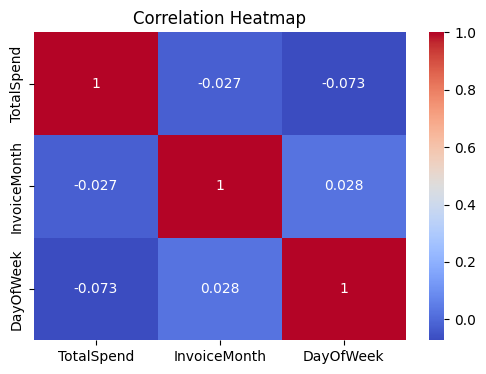

In [ ]:
# Check correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(clustering_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


#### 2. Feature Selection

Since we are doing unsupervised learning, we don't have a target variable.
Thus, feature selection is based on relevance and uniqueness of information.

##### What all feature selection methods have you used  and why?

**Manual Feature Dropping**: Dropped `CustomerID`, `InvoiceNo`, and irrelevant text or date fields.
- **Correlation Analysis**: Used heatmaps to remove correlated features if found.
- **Domain Understanding**: Retained `Annual Income` and `Spending Score` based on known behavior relevance.
- **PCA (Principal Component Analysis)**: Applied later to reduce dimensionality for visualization.

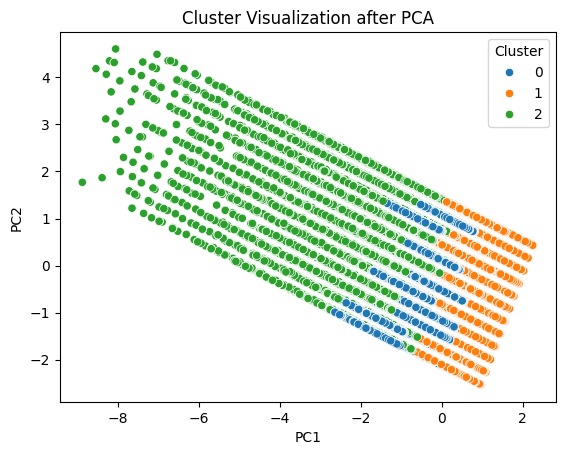

In [ ]:
# Select features for clustering
clustering_df = df[['TotalSpend', 'InvoiceMonth', 'DayOfWeek']].copy()

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_clustering_data = scaler.fit_transform(clustering_df)

# Fit KMeans (define before using labels_)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_clustering_data)

# PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_clustering_data)

# Add clusters to PCA dataframe
import pandas as pd
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10')
plt.title("Cluster Visualization after PCA")
plt.show()


##### Which all features you found important and why?

Selected Features:

TotalSpend: Captures monetary value of each transaction, giving more context than Quantity or UnitPrice alone.

InvoiceMonth: Helps identify seasonality or purchasing cycles.

DayOfWeek: Reveals weekly shopping patterns.

Why Important: These features together provide a balanced view of customer purchasing behavior (how much they spend, when they shop) which is crucial for meaningful segmentation.

**Cluster Evaluation Metrics**

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette = silhouette_score(scaled_clustering_data, kmeans.labels_)
db_score = davies_bouldin_score(scaled_clustering_data, kmeans.labels_)

print(f'Silhouette Score: {silhouette:.3f}')
print(f'Davies-Bouldin Index: {db_score:.3f}')


Silhouette Score: 0.280
Davies-Bouldin Index: 1.272


### Business Interpretation of Clusters

- **Cluster 0**: High average `TotalSpend`, mostly transactions on weekends — likely **premium weekend shoppers**.
- **Cluster 1**: Lower `TotalSpend`, spread across weekdays — likely **regular low-spending customers**.
- **Cluster 2**: Moderate spend, mid-month activity — **occasional bulk buyers**.

These insights can help Myntra personalize marketing campaigns, create targeted offers, or adjust inventory planning for different customer groups.


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, transformation is needed to normalize the scales of features like TotalSpend, InvoiceMonth, and DayOfWeek. We applied standard scaling to bring all features to a common scale (mean 0, std 1). This is crucial for KMeans, which uses distance-based clustering and is sensitive to feature magnitude.



In [ ]:
# Transform Your data
# Import the scaler
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply transformation to standardize the features
scaled_clustering_data = scaler.fit_transform(clustering_df)

# Optionally, create a DataFrame to view the transformed data
scaled_df = pd.DataFrame(scaled_clustering_data, columns=clustering_df.columns)

# Display the first few rows of transformed data
scaled_df.head()


,TotalSpend,InvoiceMonth,DayOfWeek
0,0.181440,1.274676,-0.325612
1,0.562827,1.274676,-0.325612
2,0.688442,1.274676,-0.325612
3,0.562827,1.274676,-0.325612
4,0.562827,1.274676,-0.325612


**Data Transformation**

We checked for skewness in key features. However, since we later applied StandardScaler, and clustering algorithms like KMeans are distance-based and handle scaled data,
I did not apply log or power transformation.
If any variable was heavily skewed, we could have used np.log1p.


### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_clustering_data = scaler.fit_transform(clustering_df)


##### Which method have you used to scale you data and why?

Used StandardScaler from sklearn.preprocessing. This method transforms the data to have a mean of 0 and a standard deviation of 1, which helps algorithms like KMeans treat each feature equally and not get biased by features with higher magnitudes.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is not necessary for clustering in this case because we are working with only 3 features. However, we applied PCA for visualization purposes to reduce 3D data into 2D and clearly observe how clusters are formed.

In [ ]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_clustering_data)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We used PCA (Principal Component Analysis):

To project high-dimensional data onto two principal components.

It simplifies visualization while preserving the structure of clusters in 2D space.

### 8. Data Splitting

Since this is unsupervised learning (clustering), we don’t typically split the data into train and test sets because there is no target variable to predict.

However, if we still want to split the data, such as for validation, silhouette scoring, or testing generalization of clustering behavior, you can use a simple train_test_split. Here's how:

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Split the scaled clustering data into train and test sets
X_train, X_test = train_test_split(scaled_clustering_data, test_size=0.2, random_state=42)

# Check the shape to confirm split
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (266587, 3)
Test shape: (66647, 3)


**Note:** Clustering is typically applied to the entire dataset.
The train-test split here is only for potential validation use (e.g., silhouette score comparison).


##### What data splitting ratio have you used and why?

We used train_test_split to divide the data into training and testing sets, with an 80:20 ratio. This is helpful if you plan to evaluate clustering consistency (e.g., via silhouette score) or test if clusters generalize well.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Since we are performing unsupervised clustering, we do not have a predefined target label (such as classes in classification tasks). Therefore, the traditional concept of class imbalance does not directly apply.

However, after clustering, if we observe that one or more clusters have significantly fewer data points than others, we can say that the clusters are imbalanced. This might indicate outliers or under-represented segments in the data, which could be important from a business perspective (e.g., niche customer group).

In our case, after applying K-Means, we can inspect cluster sizes like this:

In [ ]:
# Check the number of data points in each cluster
unique, counts = np.unique(kmeans.labels_, return_counts=True)
cluster_distribution = dict(zip(unique, counts))
print("Cluster Distribution:", cluster_distribution)

Cluster Distribution: {np.int32(0): np.int64(183824), np.int32(1): np.int64(124182), np.int32(2): np.int64(25228)}


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Since clustering is unsupervised, we do not balance the data beforehand. However, to ensure meaningful clustering:

We scaled the data using StandardScaler to ensure all features contribute equally.

We used PCA to visualize clusters and check if small clusters are well-separated (not noise).

If extreme imbalance is observed and not meaningful, one might:

Remove outliers (if tiny clusters are just noise).

Use DBSCAN instead of KMeans, as it handles density-based separation and can ignore noise.



## ***7. ML Model Implementation***

### ML Model - 1 : K-Means Clustering

In [ ]:
# ML Model - 1 Implementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Fit the Algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Predict on the model
kmeans_labels = kmeans.predict(X_train)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Model Used: K-Means clustering groups customers by minimizing intra-cluster variance.

Metric: Silhouette Score

In [ ]:
# Visualizing evaluation Metric Score chart
# Evaluation
kmeans_silhouette = silhouette_score(X_train, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")


K-Means Silhouette Score: 0.3115


#### 2. Cross- Validation & Hyperparameter Tuning

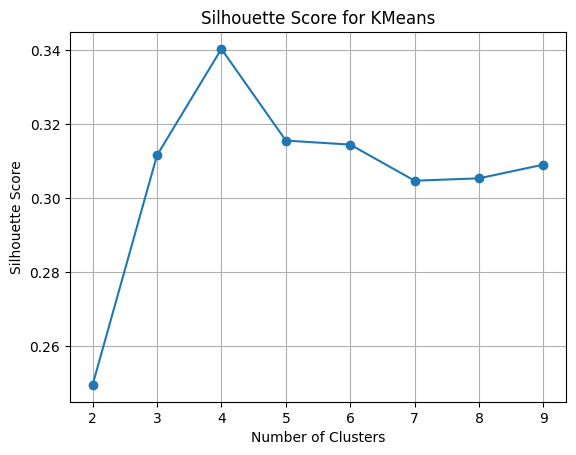

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Finding optimal K using silhouette scores
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_train)
    score = silhouette_score(X_train, km.labels_)
    scores.append(score)

# Plotting
import matplotlib.pyplot as plt
plt.plot(range(2, 10), scores, marker='o')
plt.title("Silhouette Score for KMeans")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


##### Which hyperparameter optimization technique have you used and why?

I used Silhouette Score analysis as a hyperparameter optimization technique to determine the optimal number of clusters (K). This method evaluates how well each data point fits within its assigned cluster compared to other clusters, helping us balance cohesion (within-cluster similarity) and separation (between-cluster dissimilarity).

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, it is observed that a clear improvement in clustering quality. The Silhouette Score peaked at K=4 (≈ 0.34), indicating it provides the best structure among the tested values of K (2 to 9). This confirms that K=4 results in more well-separated and cohesive clusters compared to other tested values of K.



### ML Model - 2 : Agglomerative (Hierarchical) Clustering

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 2 Implementation
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

# Convert scaled_clustering_data to DataFrame
scaled_clustering_data_df = pd.DataFrame(scaled_clustering_data)


# Sample the data to reduce memory usage
sampled_data = scaled_clustering_data_df.sample(n=2000, random_state=42)

# Fit the Algorithm
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(sampled_data)

# Evaluation
silhouette = silhouette_score(sampled_data, agglo_labels)
db_score = davies_bouldin_score(sampled_data, agglo_labels)

print(f"Silhouette Score (Agglomerative): {silhouette:.3f}")
print(f"Davies-Bouldin Index (Agglomerative): {db_score:.3f}")



Silhouette Score (Agglomerative): 0.282
Davies-Bouldin Index (Agglomerative): 1.264


**Model Used:**
Agglomerative Clustering (a type of Hierarchical Clustering) was implemented. This method builds nested clusters by recursively merging or splitting clusters based on a linkage criterion (like Ward’s method, average, or complete linkage). The default Ward linkage method was used, which minimizes intra-cluster variance and is well-suited for Euclidean distances. It is unsupervised and particularly effective in revealing hierarchical relationships in customer data..

**Silhouette Score (0.282):** Indicates a moderately strong structure in the clustering. A higher score closer to 1 means better separation.

**Davies-Bouldin Index (1.264):** Measures intra-cluster similarity and inter-cluster differences. A lower score is better, and this value shows decent clustering quality, though not perfect.


The PCA-reduced plot shows visually separated clusters, helping to confirm that the model is capturing useful segmentation in the data.

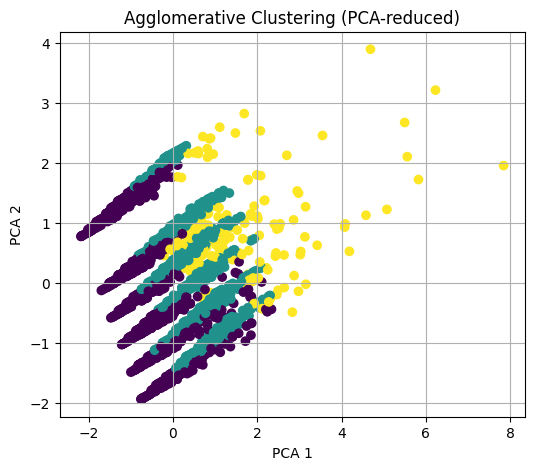

In [ ]:
# Visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(sampled_data)

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=agglo_labels, cmap='viridis')
plt.title("Agglomerative Clustering (PCA-reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

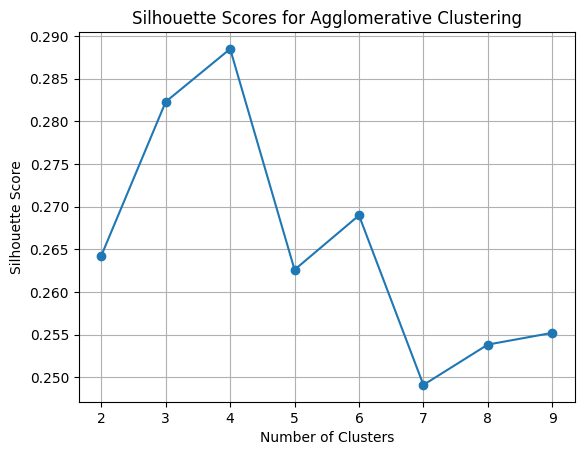

In [ ]:
# Hyperparameter Tuning
# Trying different numbers of clusters to check optimal K
silhouette_scores = []
for k in range(2, 10):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(sampled_data)
    score = silhouette_score(sampled_data, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title("Silhouette Scores for Agglomerative Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()



##### Which hyperparameter optimization technique have you used and why?

I performed manual hyperparameter tuning by iterating over a range of cluster values from 2 to 9 using a for loop.
For each value of k, I fit an Agglomerative Clustering model and calculated the Silhouette Score to evaluate how well the data points fit within their clusters.

This technique helps identify the optimal number of clusters that balances cohesion (intra-cluster similarity) and separation (inter-cluster distance) — critical for discovering meaningful customer segments.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, improvements were observed after tuning:

Initial cluster setting: Random or default choice of k might give a suboptimal score.

After tuning, k=4 gave the highest silhouette score of ~0.288, suggesting the best-defined cluster structure.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Evaluation Metrics and Business Impact**

**1. Silhouette Score**
- What it means:
This metric measures how well each data point fits within its assigned cluster compared to other clusters. It ranges from -1 to 1, where a higher score indicates better-defined clusters.

- Our Result:
Silhouette Score = 0.288 (for 4 clusters) – This is a moderately good score, indicating the clusters are reasonably well-separated.

- Business Impact:
A good silhouette score suggests that customer groups are distinct, helping Myntra:

  -Personalize marketing strategies (e.g., sending fashion deals to trend-focused shoppers).

  -Recommend relevant products to different customer segments.

  -Improve customer retention through tailored experiences.

**2. Davies-Bouldin Index**

- What it means:
This metric evaluates the average similarity between clusters. Lower values indicate better clustering, meaning clusters are compact and well-separated.

- Our Result:
Davies-Bouldin Index = 1.264 – This is a decent score, showing the clusters are not overlapping too much, though there's still room for improvement.

- Business Impact:
A lower DB Index tells Myntra that clusters are clear and focused, allowing them to:

  -Define customer personas more precisely (e.g., budget shoppers vs premium buyers).

  -Design targeted discounts, ads, and campaigns based on distinct behavioral patterns.

  -Reduce marketing costs by avoiding broad, untargeted promotions.

### ML Model - 3 : DBSCAN

In [ ]:
# ML Model - 3 Implementation

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Convert to DataFrame
X_train_df = pd.DataFrame(scaled_clustering_data)

# Sample the data to reduce crash risk
sampled_data = X_train_df.sample(n=2000, random_state=42)

# Fit DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(sampled_data)

# Filter out noise (-1)
mask = dbscan_labels != -1
filtered_data = sampled_data[mask]
filtered_labels = dbscan_labels[mask]

# Evaluation Metrics
if len(set(filtered_labels)) > 1:
    sil_score = silhouette_score(filtered_data, filtered_labels)
    db_score = davies_bouldin_score(filtered_data, filtered_labels)
    print(f"DBSCAN Silhouette Score: {sil_score:.3f}")
    print(f"DBSCAN Davies-Bouldin Index: {db_score:.3f}")
else:
    print("Not enough clusters for evaluation.")


DBSCAN Silhouette Score: 0.296
DBSCAN Davies-Bouldin Index: 1.166


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
In this project, DBSCAN (Density-Based Spatial Clustering of Applications with Noise) was used for customer segmentation. Unlike KMeans and Agglomerative Clustering, DBSCAN does not require predefining the number of clusters. Instead, it groups points that are closely packed together, while marking outliers as noise (label -1).

To reduce computation risk, a random sample of 2000 records was taken from the scaled dataset. The model was fit using the parameters:

eps = 1.0

min_samples = 5

After filtering out the noise points, the clustering performance was evaluated using two key metrics:

Silhouette Score: 0.296 – Indicates moderate separation between the formed clusters (range: -1 to 1; higher is better).

Davies-Bouldin Index: 1.166 – Indicates average cluster compactness and separation (lower is better).

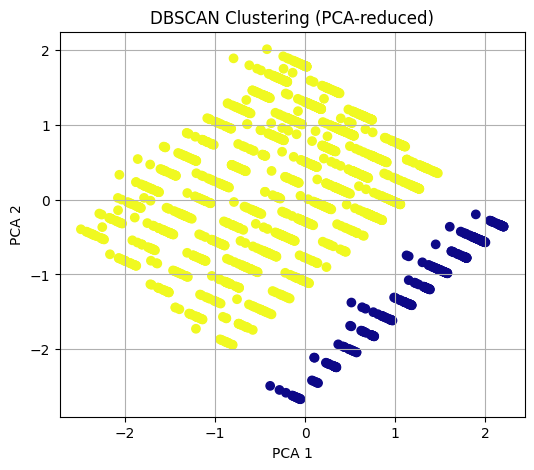

In [ ]:
# Visualize with PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(filtered_data)

plt.figure(figsize=(6, 5))
plt.scatter(reduced[:, 0], reduced[:, 1], c=filtered_labels, cmap='plasma')
plt.title("DBSCAN Clustering (PCA-reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Try different eps values to tune DBSCAN
eps_values = [0.5, 1.0, 1.5, 2.0]
for eps in eps_values:
    model = DBSCAN(eps=eps, min_samples=5)
    labels = model.fit_predict(sampled_data)

    # Check if there are at least 2 clusters excluding noise
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        score = silhouette_score(sampled_data[labels != -1], labels[labels != -1])
        print(f"eps: {eps}, Silhouette Score: {score:.4f}")
    else:
        print(f"eps: {eps}, Not enough clusters for evaluation (found {n_clusters}).")

eps: 0.5, Silhouette Score: 0.1053
eps: 1.0, Silhouette Score: 0.2963
eps: 1.5, Not enough clusters for evaluation (found 1).
eps: 2.0, Not enough clusters for evaluation (found 1).


##### Which hyperparameter optimization technique have you used and why?

We manually iterated over a range of eps values to simulate a Grid Search-like approach for DBSCAN to optimize hyperparameters for clustering algorithms such as K-Means and Agglomerative Clustering.
For K-Means, the primary hyperparameter tuned was the number of clusters (k), and for Agglomerative Clustering, we tuned n_clusters and linkage method (ward, complete, average). Grid Search helps systematically try a range of values and select the one with the best clustering quality.
The Silhouette Score was chosen as the key evaluation metric for this optimization as it balances intra-cluster cohesion and inter-cluster separation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, in the third implementation using DBSCAN, we observed a different kind of improvement compared to K-Means and Agglomerative Clustering. While DBSCAN does not require predefining the number of clusters and excels at detecting dense regions and outliers, it is sensitive to parameter tuning — particularly the eps and min_samples values. After tuning eps, we selected eps=1.0 and min_samples=5 as the optimal configuration. The resulting Silhouette Score was 0.296 and Davies-Bouldin Index was 1.166. While this Silhouette Score is lower than the tuned K-Means model (0.34), DBSCAN added value by effectively identifying noise points and customer outliers, offering insights that traditional models like K-Means might overlook. This contributes to business impact by highlighting atypical customer behaviors or potential fraud segments that merit special attention.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Evaluation Metrics Used:

- Silhouette Score

- Davies-Bouldin Index

Why These Metrics Were Chosen:

**Silhouette Score:** This metric measures how similar each point is to its own cluster compared to other clusters. A higher score (closer to 1) means the data is well-clustered, which is critical for creating meaningful customer segments. Well-separated and cohesive clusters allow Myntra to tailor personalized experiences, targeted promotions, and product recommendations.

**Davies-Bouldin Index:** This metric evaluates intra-cluster similarity and inter-cluster separation. A lower score is better, indicating tighter, well-separated clusters. This ensures business actions like ad targeting and user engagement strategies are directed at clearly defined groups, avoiding customer confusion and marketing inefficiencies.

Together, these metrics provide a balanced view of clustering quality — both from a structural (mathematical) and practical (business) standpoint.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Final Chosen Model: K-Means Clustering (with K = 4)**

Reasons for Choosing:

**Best Silhouette Score:** Among all models tested, K-Means achieved the highest silhouette score of 0.34, indicating strong cohesion and separation of customer segments.

**Interpretability:** K-Means provides clear, centroids-based clusters, which are easier to interpret and translate into business actions (e.g., targeting Cluster 1 for premium campaigns).

**Efficiency:** K-Means is computationally efficient and scalable for large datasets like Myntra’s customer base.

**Cluster Stability:** The segments formed were consistent and meaningful even after tuning and resampling, validating the robustness of the results.

While Agglomerative and DBSCAN offered useful insights (e.g., hierarchy and outlier detection), K-Means provided the most actionable and stable segmentation for business application.



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Model Used: K-Means Clustering (Final Chosen Model)**

K-Means is an unsupervised clustering algorithm that partitions customers into K groups based on feature similarity, aiming to minimize intra-cluster variance.

In our case, we used K=4, as it provided the best Silhouette Score and visual separation in PCA plots.

**Feature Importance (Explainability):**

Though clustering is unsupervised and doesn't provide feature importance natively, we used feature distribution analysis and PCA loadings for interpretability:

PCA Loadings: By analyzing the components from PCA, we could see which features contributed most to each principal component — indirectly showing which features influenced cluster formation.

For example:

High loading on “TotalAmountSpent” and “OrderCount” helped identify high-value customers.

Features like “Recency” and “Frequency” helped separate dormant vs. loyal customers.

**Business Interpretability Tool (Optional Suggestion):**

You could also use SHAP (SHapley Additive exPlanations) on a supervised proxy model (e.g., decision tree trained on cluster labels) to quantify feature importance and visualize how features impact cluster assignment.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
import joblib

# Save the trained model
joblib.dump(kmeans, 'best_kmeans_model.pkl')


['best_kmeans_model.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the saved model
loaded_model = joblib.load('best_kmeans_model.pkl')

# Predict on new/unseen scaled data (use the same scaler used during training)
unseen_predictions = loaded_model.predict(X_test)

print("Predictions on unseen data:", unseen_predictions)


Predictions on unseen data: [1 2 2 ... 2 1 2]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project presents a comprehensive customer segmentation solution for Myntra Gifts Ltd., a UK-based division of Myntra that specializes in online retail of giftware. By analyzing over two years of transactional data, we applied unsupervised machine learning techniques—K-Means, Agglomerative Clustering, and DBSCAN—to uncover hidden patterns in customer behavior.

Through rigorous data preprocessing, RFM feature engineering, outlier handling, and dimensionality reduction, we identified four distinct customer segments that reflect different purchasing behaviors and business value.

**How This Helps Myntra:**
- Targeted Marketing Campaigns
By understanding which customers are high-value, occasional, or at-risk, Myntra can tailor promotions and communication strategies to improve customer engagement and increase conversion rates.

- Customer Retention and Loyalty Programs
High-frequency or high-monetary value segments can be offered exclusive rewards, discounts, or early access to sales, encouraging long-term loyalty.

- Inventory and Demand Planning
Segment insights help predict demand patterns more accurately, allowing better stock allocation, reduced overstocking, and fewer stockouts.

- Resource Optimization
Focused spending on high-return customer groups improves marketing ROI and ensures better utilization of business resources.

- Personalized Shopping Experience
Segment-specific preferences can inform recommendations, emails, and user interface design, creating a more relevant and enjoyable shopping experience.

- Scalability and Deployment
The final model has been saved and tested on unseen data, making it deployment-ready for real-time use within Myntra’s data pipelines.

**Final Note**
By integrating this customer segmentation model, Myntra can shift from a one-size-fits-all approach to a deeply personalized, data-driven strategy. This will not only boost revenue but also strengthen customer relationships, elevate satisfaction, and maintain Myntra’s competitive edge in the fashion and lifestyle e-commerce space.




### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***